## 第四章 神经网络的学习
1. 从数据中学习
2. 损失函数
3. 数值微分
4. 梯度
5. 学习算法的实现
6. 小结

### 4.1 从数据中学习
- 本章的主题是神经网络的学习。这里所说的“学习”是指从训练数据中自动获取**最优权重参数**的过程。本章中，为了使神经网络能进行学习，将导入**损失函数**这一指标。而学习的目的就是以该损失函数为基准，找出能使它的值达到**最小**的权重参数。为了找出尽可能小的损失函数的值，本章我们将介绍利用了**函数斜率的梯度法**。
- 数据是机器学习的命根子。从数据中寻找答案、从数据中发现**模式**、根据数据讲故事……这些机器学习所做的事情，如果没有数据的话，就无从谈起。因此，数据是机器学习的核心。这种数据驱动的方法，也可以说脱离了过往以人为中心的方法。
- 机器学习的方法则极力避免人为介入，尝试从收集到的数据中发现答案（模式）。一个能将 5 正确分类的程序,先从图像中提取**特征量**，再用机器学习技术学习这些特征量的模式。这里所说的“特征量”是指可以从输入数据（输入图像）中准确地提取本质数据（重要的数据）的转换器。
- 机器学习的方法中，由机器从收集到的数据中找出规律性。但是需要注意的是，将图像转换为向量时使用的特征量仍是由人设计的。对于不同的问题，必须使用合适的特征量（必须设计专门的特征量），才能得到好的结果。比如，为了区分狗的脸部，人们需要考虑与用于识别 5 的特征量不同的其他特征量。而在神经网络中，连图像中包含的重要特征量也都是由机器来学习的。
- **深度学习**有时也称为端到端机器学习（end-to-end machine learning ）。这里所说的端到端是指从一端到另一端的意思，也就是从原始数据（输入）中获得目标结果（输出）的意思。
- 神经网络的优点是对*所有的问题*都可以用*同样的流程*来解决。比如，不管要求解的问题是识别 5，还是识别狗，抑或是识别人脸，神经网络都是通过不断地学习所提供的数据，尝试发现待求解的问题的**模式**。也就是说，与待处理的问题无关，神经网络可以将数据直接作为原始数据，进行“端对端”的学习。
- 机器学习中，一般将数据分为*训练数据*和*测试数据*两部分来进行学习和实验等。首先，使用训练数据进行学习，寻找最优的参数；然后，使用测试数据评价训练得到的模型的实际能力。为什么需要将数据分为训练数据和测试数据呢？因为我们追求的是模型的**泛化能力**。为了正确评价模型的泛化能力，就必须划分训练数据和测试数据。另外，训练数据也可以称为**监督数据**。
- 泛化能力是指处理**未被观察过的数据**（不包含在训练数据中的数据）的能力。获得泛化能力是机器学习的*最终目标*。比如，在识别手写数字的问题中，泛化能力可能会被用在自动读取明信片的邮政编码的系统上。
- 因此，仅仅用一个数据集去学习和评价参数，是无法进行正确评价的。这样会导致可以顺利地处理某个数据集，但无法处理其他数据集的情况。顺便说一下，只对某个数据集过度拟合的状态称为**过拟合(over fitting)**。避免过拟合也是机器学习的一个重要课题。

### 4.2 损失函数 loss function
- 神经网络以某个指标为线索寻找最优权重参数。神经网络的学习中所用的指标称为损失函数（loss function）。这个损失函数可以使用任意函数，但一般用均方误差和交叉熵误差。
- 分类问题：输出是概率分布 → 需要Softmax归一化 → 交叉熵衡量分布差异. 交叉熵 + Softmax的梯度: dL/dx = (y - t), 直接是预测与真实的差异
- 回归问题：输出是具体数值 → 需要保持数值范围 → 均方误差衡量数值差异. 均方误差的梯度：dL/dx = (y - t) * dy/dx , 需要乘以激活函数的导数
- 损失函数是表示神经网络性能的“恶劣程度”的指标，即当前的神经网络对监督数据在多大程度上**不拟合**，在多大程度上**不一致**。以“性能的恶劣程度”为指标可能会使人感到不太自然，但是如果给损失函数乘上一个负值，就可以解释为“在多大程度上不坏”，即“性能有多好”。并且，“使性能的恶劣程度达到最小”和“使性能的优良程度达到最大”是等价的，不管是用“恶劣程度”还是“优良程度”，做的事情本质上都是一样的。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

#### 4.2.1 均方误差 Mean Squared Error(MSE): $y_k$ 是表示神经网络的输出，$t_k$ 表示监督数据，k 表示数据的维数。
$$E = \frac{1}{2}\sum\limits_{k}(y_k - t_k)^2$$

In [2]:
# 求每条数据均方误差和，多个值,数量=len(x)
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2, axis=-1)

# 求所有数据的平均误差,一个值
def mse(y, t):
    return 0.5 * np.mean((y - t) ** 2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]    # one-hot-vector
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mse1 = mean_squared_error(np.array(y1), np.array(t))
mse2 = mean_squared_error(np.array(y2), np.array(t))
print(mse1, mse2)

0.09750000000000003 0.5975


#### 4.2.2 交叉熵误差 Cross Entropy Error: 
$$E = -\sum\limits_{k}t_k log y_k$$
```python
def 交叉熵奖惩系统(预测概率, 真实标签):
    if 预测得很准:
        奖励 = -log(接近1的数) ≈ 很小的正数 🎯
    elif 预测得一般:
        惩罚 = -log(中等概率) = 中等损失 😕  
    else:  # 预测得很差
        严惩 = -log(接近0的数) = 很大的数 💥
```

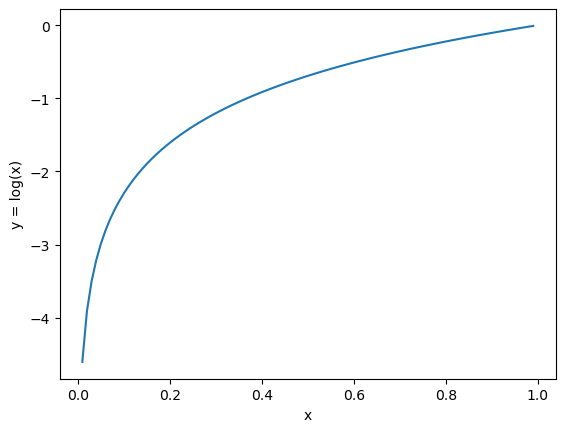

In [4]:
x = np.arange(0.01, 1, 0.01)
y = np.log(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y = log(x)')
plt.show()

In [5]:
print(-np.log(0.1))
print(-np.log(0.5))
print(-np.log(0.9))
# log函数的完美特性：
x = [0.01, 0.1, 0.5, 0.9, 0.99]
loss = -np.log(x)
print(f"预测概率: {x}")
print(f"对应损失: {loss}")
# 预测概率: [0.01, 0.1, 0.5, 0.9, 0.99]
# 对应损失: [4.605, 2.303, 0.693, 0.105, 0.010]

2.3025850929940455
0.6931471805599453
0.10536051565782628
预测概率: [0.01, 0.1, 0.5, 0.9, 0.99]
对应损失: [4.60517019 2.30258509 0.69314718 0.10536052 0.01005034]


In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [7]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]    # one-hot-vector
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y1), np.array(t)))
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


#### 4.2.3 mini-batch 小批量学习
如果以全部数据为对象求损失函数的和，则计算过程需要花费较长的时间。因此，我们从全部数据中选出一部分，作为全部数据的“**近似**”。神经网络的学习也是从训练数据中选出一批数据（称为 mini-batch, 小批量），然后对每个 mini-batch 进行学习。比如，从 60000 个训练数据中随机选择 100 笔，再用这 100 笔数据进行学习。这种学习方式称为 **mini-batch 学习**。

In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(batch_mask)
print(x_batch)
print(t_batch)

[28901 57405 48029 51030 25585 36353  5415 47220 43179 26804]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


#### 4.2.4 mini-batch 版交叉熵误差的实现: 
所有训练数据的损失函数的总和, 把求单个数据的损失函数的式扩大到了 N 份数据，不过最后还要除以 N 进行正规化。通过除以 N，可以求单个数据的“**平均损失函数**”。通过这样的平均化，可以获得和训练数据的**数量无关**的统一指标。比如，即便训练数据有 1000 个或 10000 个，也可以求得单个数据的平均损失函数。
$$E = -\frac{1}{N}\sum\limits_n\sum\limits_kt_{nk}logy_{nk}$$

In [10]:
def cross_entropy_error(y, t):
    # 统一输入格式,处理单条数据,转换给二维 y.ndim=2，y.shape=(1, 10)
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
    # 如果t是one-hot-vector，转换成标签形式
    if t.size == y.size:
        t = t.argmax(axis=-1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def cross_entropy_error_onehot(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [11]:
yy = [[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.05, 0.1, 0.0, 0.05, 0.0, 0.0, 0.7, 0.0, 0.0]]
t_onehot = [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
t_label = [2, 7]
print(cross_entropy_error(np.array(yy), np.array(t_onehot)))
print(cross_entropy_error(np.array(yy), np.array(t_label)))

0.43375012909046895
0.43375012909046895


In [12]:
# 解释 np.log(y[np.arange(batch_size), t])：监督数据是标签形式（非 one-hot 表示，而是像“2”“7”这样的标签）
# 首先强调下，这是numpy数组的专属操作，普通列表[[1,2], [3,4], ...]无法如此操作
yy = np.array([
    [0.1, 0.2, 0.6, 0.05, 0.05],  # 对类别2预测概率0.6
    [0.7, 0.1, 0.1, 0.05, 0.05],  # 对类别0预测概率0.7
    [0.1, 0.1, 0.2, 0.5, 0.1]     # 对类别3预测概率0.5
])
t_one_hot = np.array([
    [0, 0, 1, 0, 0],  # 标签2
    [1, 0, 0, 0, 0],  # 标签0
    [0, 0, 0, 1, 0]   # 标签3
])
t_labels = np.array([2, 0, 3])  # 同样的数据，用标签形式表示，直接存储正确类别的索引

batch_size = yy.shape[0]        # 3
indices = np.arange(batch_size) # [0, 1, 2]
print("样本索引:", indices)      # [0, 1, 2]
print("真实标签:", t_labels)     # [2, 0, 3]

selected_probs = yy[indices, t_labels]
print("选中的概率:", selected_probs)  # [0.6, 0.7, 0.5]
# 相当于：
# y[0, 2] → 第0个样本，第2个类别的概率 = 0.6
# y[1, 0] → 第1个样本，第0个类别的概率 = 0.7
# y[2, 3] → 第2个样本，第3个类别的概率 = 0.5

result1 = cross_entropy_error_onehot(yy, t_one_hot)
result2 = cross_entropy_error_label(yy, t_labels)
print(f'交叉熵误差值onehot: {result1}')      # 0.5202157462469678
print(f'交叉熵误差值 label: {result2}')      # 0.5202157462469678

样本索引: [0 1 2]
真实标签: [2 0 3]
选中的概率: [0.6 0.7 0.5]
交叉熵误差值onehot: 0.5202157462469678
交叉熵误差值 label: 0.5202157462469678


#### 4.2.5 为何要设定损失函数
- 我们可以根据“**导数**”在神经网络学习中的作用来回答。在神经网络的学习中，寻找最优参数（权重和偏置）时，要寻找使损失函数的值尽可能小的参数。为了找到使损失函数的值尽可能小的地方，需要计算参数的导数（确切地讲是**梯度**），然后以这个导数为指引，逐步更新参数的值。
- 假设有一个神经网络，现在我们来关注这个神经网络中的某一个权重参数。此时，对该权重参数的损失函数求导，表示的是“如果**稍微改变**这个权重参数的值，损失函数的值会**如何变化**”。如果导数的值为**负**，通过使该权重参数向**正方向**改变，可以减小损失函数的值；反过来，如果导数的值为**正**，则通过使该权重参数向**负方向**改变，可以减小损失函数的值。
- 不过，当导数的值为 0 时，无论权重参数向哪个方向变化，损失函数的值都不会改变，此时该权重参数的更新会停在此处。之所以不能用识别**精度**作为指标，是因为这样一来绝大多数地方的导数都会变为 0，导致参数无法更新。
- 总之，在进行神经网络的学习时，不能将识别精度作为指标。因为如果以识别精度为指标，则参数的导数在绝大多数地方都会变为 0。原因是：我们来思考另一个具体例子。假设某个神经网络正确识别出了 100 笔训练数据中的 32 笔，此时识别精度为 32 %。如果以识别精度为指标，即使稍微改变权重参数的值，识别精度也仍将保持在 32 %，不会出现变化。也就是说，仅仅**微调参数**，是无法改善识别精度的。即便识别精度有所改善，它的值也不会像 32.0123. . . % 这样连续变化，而是变为 33 %、34 % 这样的**不连续的、离散的值**。而如果把损失函数作为指标，则当前损失函数的值可以表示为 0.92543. . . 这样的值。并且，如果稍微改变一下参数的值，对应的损失函数也会像 0.93432. . . 这样发生**连续性**的变化。
- **识别精度**对**微小的参数变化**基本上**没有什么反应**，即便有反应，它的值也是**不连续地、突然地变化**。
- 作为激活函数的**阶跃函数**也有同样的情况。出于相同的原因，如果使用阶跃函数作为激活函数，神经网络的学习将无法进行。

### 4.3 数值微分
利用微小的差分求导数的过程称为**数值微分**(numerical differentiation).而基于*数学式*的推导求导数的过程，则用“解析性”(analytic)一词，称为**解析性求导**。

#### 4.3.1 导数：表示的是某个瞬间的变化量
$$\frac{df(x)}{dx} = \lim\limits_{h\to0}\frac{f(x+h)-f(x)}{h}$$
表示 f(x) 关于 x 的导数，即 f(x) 相对于 x 的**变化程度**。导数的含义是，x 的“**微小变化**”将导致函数 f(x) 的值在多大程度上发生变化。其中，表示微小变化的 h 无限趋近 0，表示为$\lim\limits_{h \to 0}$ 。

In [13]:
# 向前差分
def numerical_diff_forward(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / h

# 中心差分
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [14]:
# 例子函数 y = 0.01x^2 + 0.1x, 它的解析性求导：y = 0.02x + 0.1
def function_1(x):
    return 0.01 * x**2 + 0.1 * x

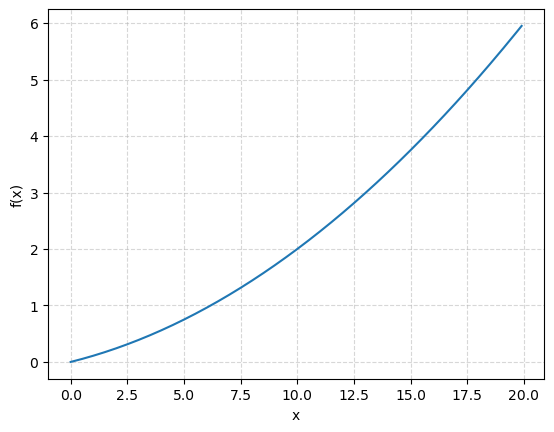

In [15]:
# 画出函数图像
x = np.arange(0, 20, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [16]:
# 求导
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


求f(x)在x=5处导数的值：0.1999999999990898
求f(x)在x=10处导数的值：0.2999999999986347


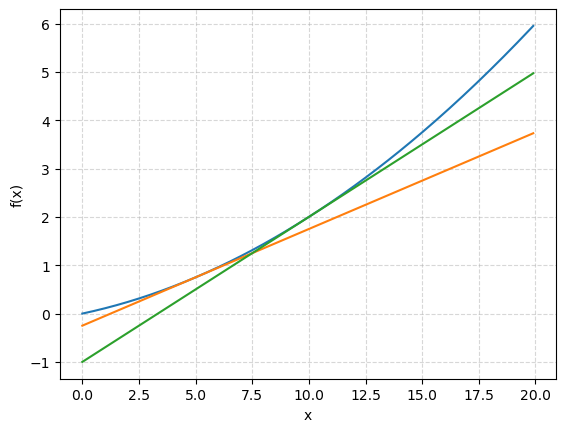

In [17]:
# 画出 x = 5, x = 10 处的切线：直线的斜率使用数值微分的值
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(f'求f(x)在x={x}处导数的值：{d}')
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

tf = tangent_line(function_1, 10)
y3 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 4.3.3 偏导数：有多个变量的函数的导数 $f(x_0, x_1) = x_0^2 + x_1^2$

In [18]:
def function_2(x):
    # return x[0]**2 + x[1]**2
    return np.sum(x**2)

# x[0] = 3, x[1] = 4, 关于x[0]的偏导数
def function_tmp1(x0):
    return x0**2 + 4**2

# x[0] = 3, x[1] = 4, 关于x[1]的偏导数
def function_tmp2(x1):
    return 3**2 + x1**2

print(numerical_diff(function_tmp1, 3))
print(numerical_diff(function_tmp2, 4))

6.00000000000378
7.999999999999119


### 4.4 梯度 Gradient: 由全部变量的偏导数汇总而成的向量 $(\frac{∂f}{∂x_0}, \frac{∂f}{∂x_1}, \frac{∂f}{∂x_2},...)$

In [19]:
def numerical_gradient_1d(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)    # f(x+h)
        x[idx] = tmp_val - h
        fxh2 = f(x)    # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val    # 还原值
    return grad


def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()
    
    return grad
    

# grads = {
#     'W1': np.zeros((784, 50)),    # 39,200个梯度
#     'b1': np.zeros(50),           # 50个梯度  
#     'W2': np.zeros((50, 10)),     # 500个梯度
#     'b2': np.zeros(10)            # 10个梯度
# }
# 总计: 39,200 + 50 + 500 + 10 = 39,760个梯度    
# 需要: 39,760 × 2 = 79,520 次前向传播！
# 每个参数计算2次损失函数

In [20]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([3.0, 4.0, 5.0, 6.0])))
print(numerical_gradient(function_2, np.array([[3.0, 4.0], [5.0, 6.0]])))

[6. 8.]
[ 6.  8. 10. 12.]
[[ 6.  8.]
 [10. 12.]]


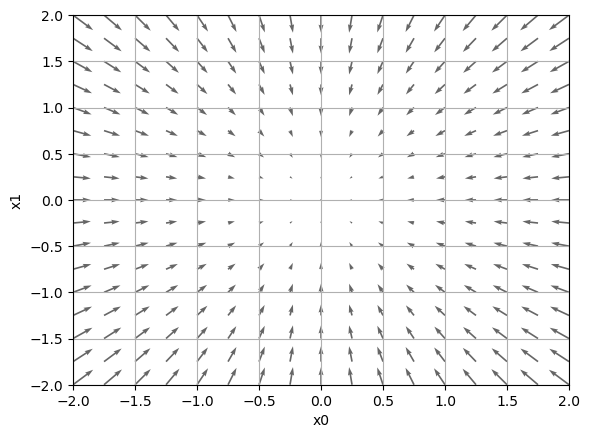

In [21]:
# 画出梯度的图
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

#### 4.4.1 梯度下降法
$$x_0 = x_0 - η\frac{∂f}{∂x_0}$$
$$x_1 = x_1 - η\frac{∂f}{∂x_1}$$
- 神经网络也必须在学习时找到最优参数（权重和偏置）。这里所说的最优参数是指损失函数取最小值时的参数。但是，一般而言，损失函数很复杂，参数空间庞大，我们不知道它在何处能取得最小值。而通过巧妙地使用梯度来寻找函数最小值（或者尽可能小的值）的方法就是梯度法。
- 这里需要注意的是，梯度表示的是各点处的函数值减小最多的方向。因此，无法保证梯度所指的方向就是函数的最小值或者真正应该前进的方向。实际上，在复杂的函数中，梯度指示的方向基本上都不是函数值最小处。
- 虽然梯度的方向并不一定指向最小值，但沿着它的方向能够最大限度地减小函数的值。因此，在寻找函数的最小值（或者尽可能小的值）的位置的任务中，要以梯度的信息为线索，决定前进的方向。
- 在梯度法中，函数的取值从当前位置沿着梯度方向前进一定距离，然后在新的地方重新求梯度，再沿着新梯度方向前进，如此反复，不断地沿梯度方向前进。像这样，通过不断地沿梯度方向前进，逐渐减小函数值的过程就是梯度法 （ gradient method ）。
- η 表示更新量，在神经网络的学习中，称为学习率 （ learning rate ）这样的参数称为超参数。学习率决定在一次学习中，应该学习多少，以及在多大程度上更新参数。学习率过大或者过小都无法得到好的结果。学习率过大的话，会发散成一个很大的值；反过来，学习率过小的话，基本上没怎么更新就结束了。也就是说，设定合适的学习率
是一个很重要的问题。

In [22]:
# 每次更新x之后，都重新计算当前的x梯度; 根据梯度和学习率，更新X的值 x = x - (lr * grad)
def gradient_descent(f, x, lr=0.01, step_num=100):
    for i in range(step_num): 
        grad = numerical_gradient(f, x)
        x -= lr * grad
        if i % 20 == 0:
            print(f'Grad-{i}: {grad}')
            print(f'Xval-{i}: {x} \n')
    return x

In [23]:
gradient_descent(function_2, np.array([-3.0, 4.0]), 0.1)
# gradient_descent(function_2, np.array([[-3.0, 4.0], [5.0, 6.0]]), 0.1) # 可处理输入是多维数组

Grad-0: [-6.  8.]
Xval-0: [-2.4  3.2] 

Grad-20: [-0.06917529  0.09223372]
Xval-20: [-0.02767012  0.03689349] 

Grad-40: [-0.00079754  0.00106338]
Xval-40: [-0.00031901  0.00042535] 

Grad-60: [-9.19497325e-06  1.22599643e-05]
Xval-60: [-3.67798930e-06  4.90398573e-06] 

Grad-80: [-1.06010824e-07  1.41347765e-07]
Xval-80: [-4.24043296e-08  5.65391061e-08] 



array([-6.11110793e-10,  8.14814391e-10])

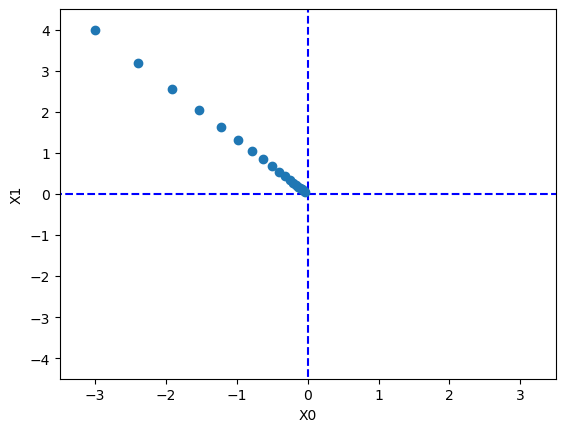

In [24]:
# 用图来表示梯度法的更新过程,原点处是最低的地方，函数的取值一点点在向其靠近。
def gradient_descent_show(f, x, lr=0.01, step_num=100):
    x_history = []
    for i in range(step_num):
        x_history.append( x.copy() )
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

x, x_history = gradient_descent_show(function_2, np.array([-3.0, 4.0]), lr=0.1, step_num=20)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

#### 4.4.2 神经网络的梯度: 
损失函数L关于权重参数W的梯度 $\frac{∂L}{∂W}$, 由各个元素关于 W 的偏导数构成。比如，第 1 行第 1 列的元素$\frac{\partial L}{\partial w_{11}}$表示当$w_{11}$稍微变化时，损失函数 L 会发生多大变化。这里的重点是，$\frac{\partial L}{\partial W}$的形状和 W 相同.
$$W = \begin{pmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{pmatrix}$$
$$\frac{∂L}{∂W} = \begin{pmatrix} \frac{∂L}{∂w_{11}} & \frac{∂L}{∂w_{12}} & \frac{∂L}{∂w_{13}} \\ \frac{∂L}{∂w_{21}} & \frac{∂L}{∂w_{22}} & \frac{∂L}{∂w_{23}} \end{pmatrix}$$
```python
grads = {
    'W1': np.zeros((784, 50)),    # 39,200个梯度
    'b1': np.zeros(50),           # 50个梯度  
    'W2': np.zeros((50, 10)),     # 500个梯度
    'b2': np.zeros(10)            # 10个梯度
}
# 总计: 39,200 + 50 + 500 + 10 = 39,760个梯度 

In [25]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.43900738  0.12796068 -0.56696806]
 [ 0.65851106  0.19194102 -0.85045209]]


### 4.5 学习算法的实现

- 前提: 神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的过程称为“学习”。神经网络的学习分成下面 4 个步骤。
- SGD: 随机梯度下降法 (Stochastic Gradient Descent)
1. mini-batch: 从训练数据中随机选出一部分数据，这部分数据称为 mini-batch, 目标是减小 mini-batch 的损失函数的值。
2. 计算梯度: 为了减小 mini-batch 的**损失函数**的值，需要求出各个权重参数的梯度。梯度表示损失函数的值**减小最多**的方向。
3. 更新参数: 将权重参数沿梯度方向进行微小更新。
4. 重复步骤 1、步骤 2、步骤 3。

#### 4.5.1 两层神经网络的类

In [26]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    # 初始化权重
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
        # 学完第五章知道，这里这么写，每次推理(predict 即预测/推理)阶段，必须计算Softmax（即使不需要概率），效率低。
        # 而第五章，把softmax的计算，放到了计算loss当中，只在训练时才会用到softmax，所以更高效，节约计算资源

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y==t) / x.shape[0]
        return accuracy
        
    def loss(self, x, t):
        y = self.predict(x)
        loss = cross_entropy_error(y, t)
        return loss

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [27]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [28]:
print(net.params['W1'].shape)
print(net.params['W2'].shape)
print(net.params['b1'].shape)
print(net.params['b2'].shape)

(784, 100)
(100, 10)
(100,)
(10,)


In [29]:
x = np.random.rand(100, 784) # 伪输入数据（ 100笔）
t = np.random.rand(100, 10) # 伪正确解标签（ 100笔）
y = net.predict(x)

In [30]:
y.shape

(100, 10)

In [31]:
# 计算梯度 - 耗时
grads = net.numerical_gradient(x, t)

In [32]:
# 因为梯度是 损失函数对各个参数求导的汇总，所以耗时，计算各个参数相对于损失函数的梯度
# 且形状跟每个参数一样，有多少个参数，就有多少个对应的梯度数值（根据数值微分计算各个参数的梯度）
print(grads['W1'].shape)
print(grads['W2'].shape)
print(grads['b1'].shape)
print(grads['b2'].shape)

(784, 100)
(100, 10)
(100,)
(10,)


#### 4.5.2 mini-batch 的实现
神经网络的学习的实现使用的是前面介绍过的 mini-batch 学习。所谓mini-batch 学习，  
就是从训练数据中随机选择一部分数据（称为 mini-batch），再以这些 mini-batch 为对象，使用梯度法更新参数的过程.

In [33]:
# Load data
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)
# Initialize network
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []

for i in range(iters_num):
    # 1. Get mini_batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 2. Calculate gradient
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 3. Update params
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # Record learning process
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

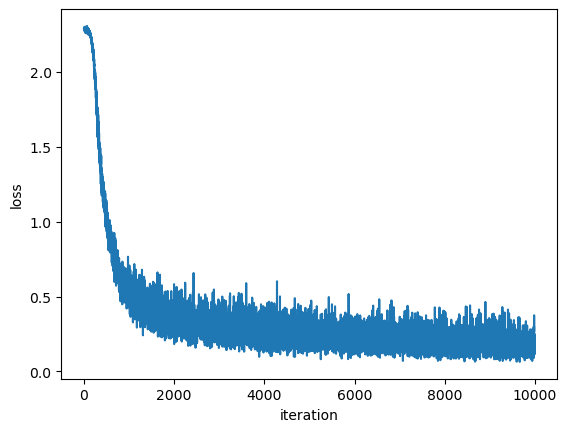

In [34]:
# 用图像来表示这个损失函数的值的推移, 可以发现随着学习的进行，损失函数的值在不断减小。
# 这是学习正常进行的信号，表示神经网络的权重参数在逐渐拟合数据。也就是说，神经网络的确在学习.
# 通过反复地向它浇灌（输入）数据，神经网络正在逐渐向最优参数靠近。
x = np.arange(iters_num)
y = train_loss_list
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(x, y)
plt.show()

#### 4.5.3 基于测试数据的评价
- 确认是否能够正确识别训练数据以外的其他数据，即确认是否会发生过拟合。  
- 神经网络学习的最初目标是掌握泛化能力，因此，要评价神经网络的泛化能力，就必须使用不包含在训练数据中的数据。  
- 下面的代码在进行学习的过程中，会定期地对训练数据和测试数据记录识别精度。  
- 这里，每经过一个epoch，我们都会记录下训练数据和测试数据的识别精度。
- epoch 是一个单位。一个 epoch 表示学习中所有训练数据均被使用过一次时的更新次数。比如，对于 60000 笔训练数据，用大小为 100笔数据的 mini-batch 进行学习时，重复随机梯度下降法 600 次，所有的训练数据就都被“看过”了。此时，600 次就是一个 epoch。

In [35]:
# Load data
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)
# Initialize network
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []
# 平均每个 epoch的重复次数 (即需要这么多次才能把所有数据都用完一轮)
iter_per_epoch = int(max(train_size / batch_size, 1))    # 60000 / 100 = 600.0

for i in range(iters_num):
    # 1. Get mini_batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 2. Calculate gradient
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 3. Update params
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # Record learning process
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 计算每个epoch的识别精度 (循环600次为一个epoch，所有60000条数据都被用过了)
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f'Epoch {i // iter_per_epoch + 1}: train acc, test acc | {train_acc:.2%}, {test_acc:.2%}')


Epoch 1: train acc, test acc | 10.05%, 9.57%
Epoch 2: train acc, test acc | 77.53%, 77.98%
Epoch 3: train acc, test acc | 87.53%, 87.92%
Epoch 4: train acc, test acc | 89.86%, 90.30%
Epoch 5: train acc, test acc | 90.84%, 91.15%
Epoch 6: train acc, test acc | 91.57%, 91.72%
Epoch 7: train acc, test acc | 92.05%, 92.23%
Epoch 8: train acc, test acc | 92.49%, 92.52%
Epoch 9: train acc, test acc | 92.79%, 92.87%
Epoch 10: train acc, test acc | 93.08%, 93.08%
Epoch 11: train acc, test acc | 93.44%, 93.39%
Epoch 12: train acc, test acc | 93.62%, 93.43%
Epoch 13: train acc, test acc | 93.88%, 93.74%
Epoch 14: train acc, test acc | 94.01%, 93.96%
Epoch 15: train acc, test acc | 94.30%, 94.12%
Epoch 16: train acc, test acc | 94.43%, 94.28%
Epoch 17: train acc, test acc | 94.62%, 94.42%


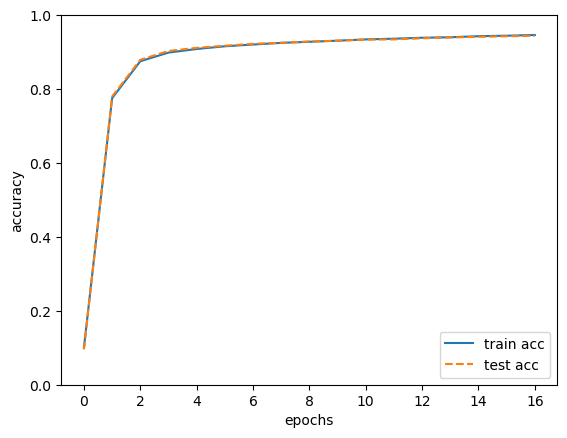

In [36]:
# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 4.6 小结
本章中，我们介绍了神经网络的学习。首先，为了能顺利进行神经网络的学习，我们导入了损失函数这个指标。以这个损失函数为基准，找出使它的值达到最小的权重参数，就是神经网络学习的目标。为了找到尽可能小的损失函数值，我们介绍了使用函数斜率的梯度法。
- 机器学习中使用的数据集分为训练数据和测试数据。
- 神经网络用训练数据进行学习，并用测试数据评价学习到的模型的泛化能力。
- 神经网络的学习以损失函数为指标，更新权重参数，以使损失函数的值减小。
- 利用某个给定的微小值的差分求导数的过程，称为数值微分。
- 利用数值微分，可以计算权重参数的梯度。
- 数值微分虽然费时间，但是实现起来很简单。下一章中要实现的稍微复杂一些的误差反向传播法可以高速地计算梯度。